In [466]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm_drop.xlsx")


In [467]:
data_main

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,0.000000,0.000000,0.461877
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,0.035381,0.020055,0.260330
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [468]:
data

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,NaN,NaN,NaN
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,NaN,NaN,NaN
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [469]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

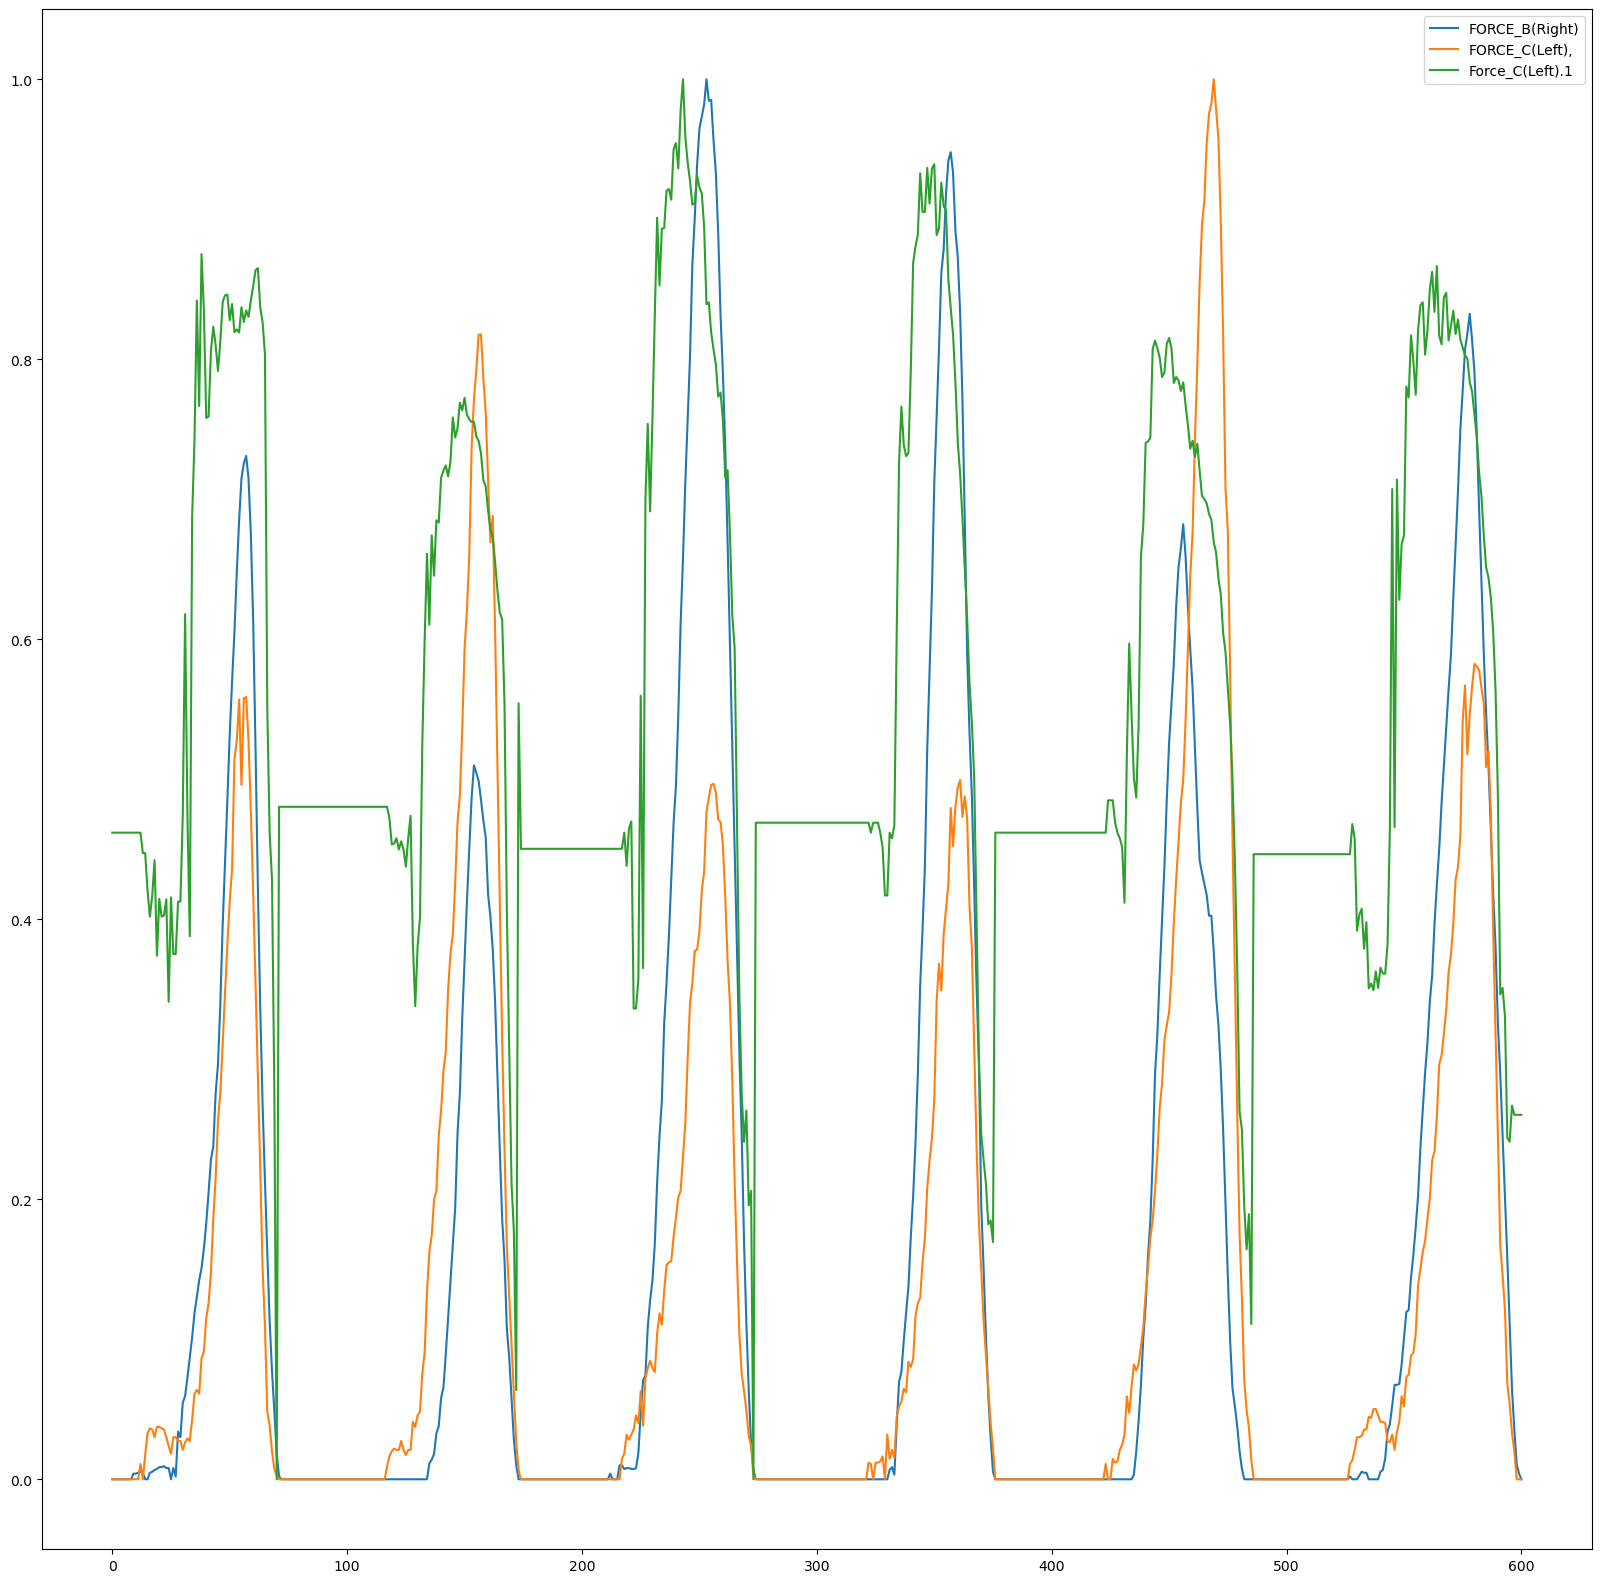

In [470]:
data_main.plot(figsize=(20,20))

<Axes: >

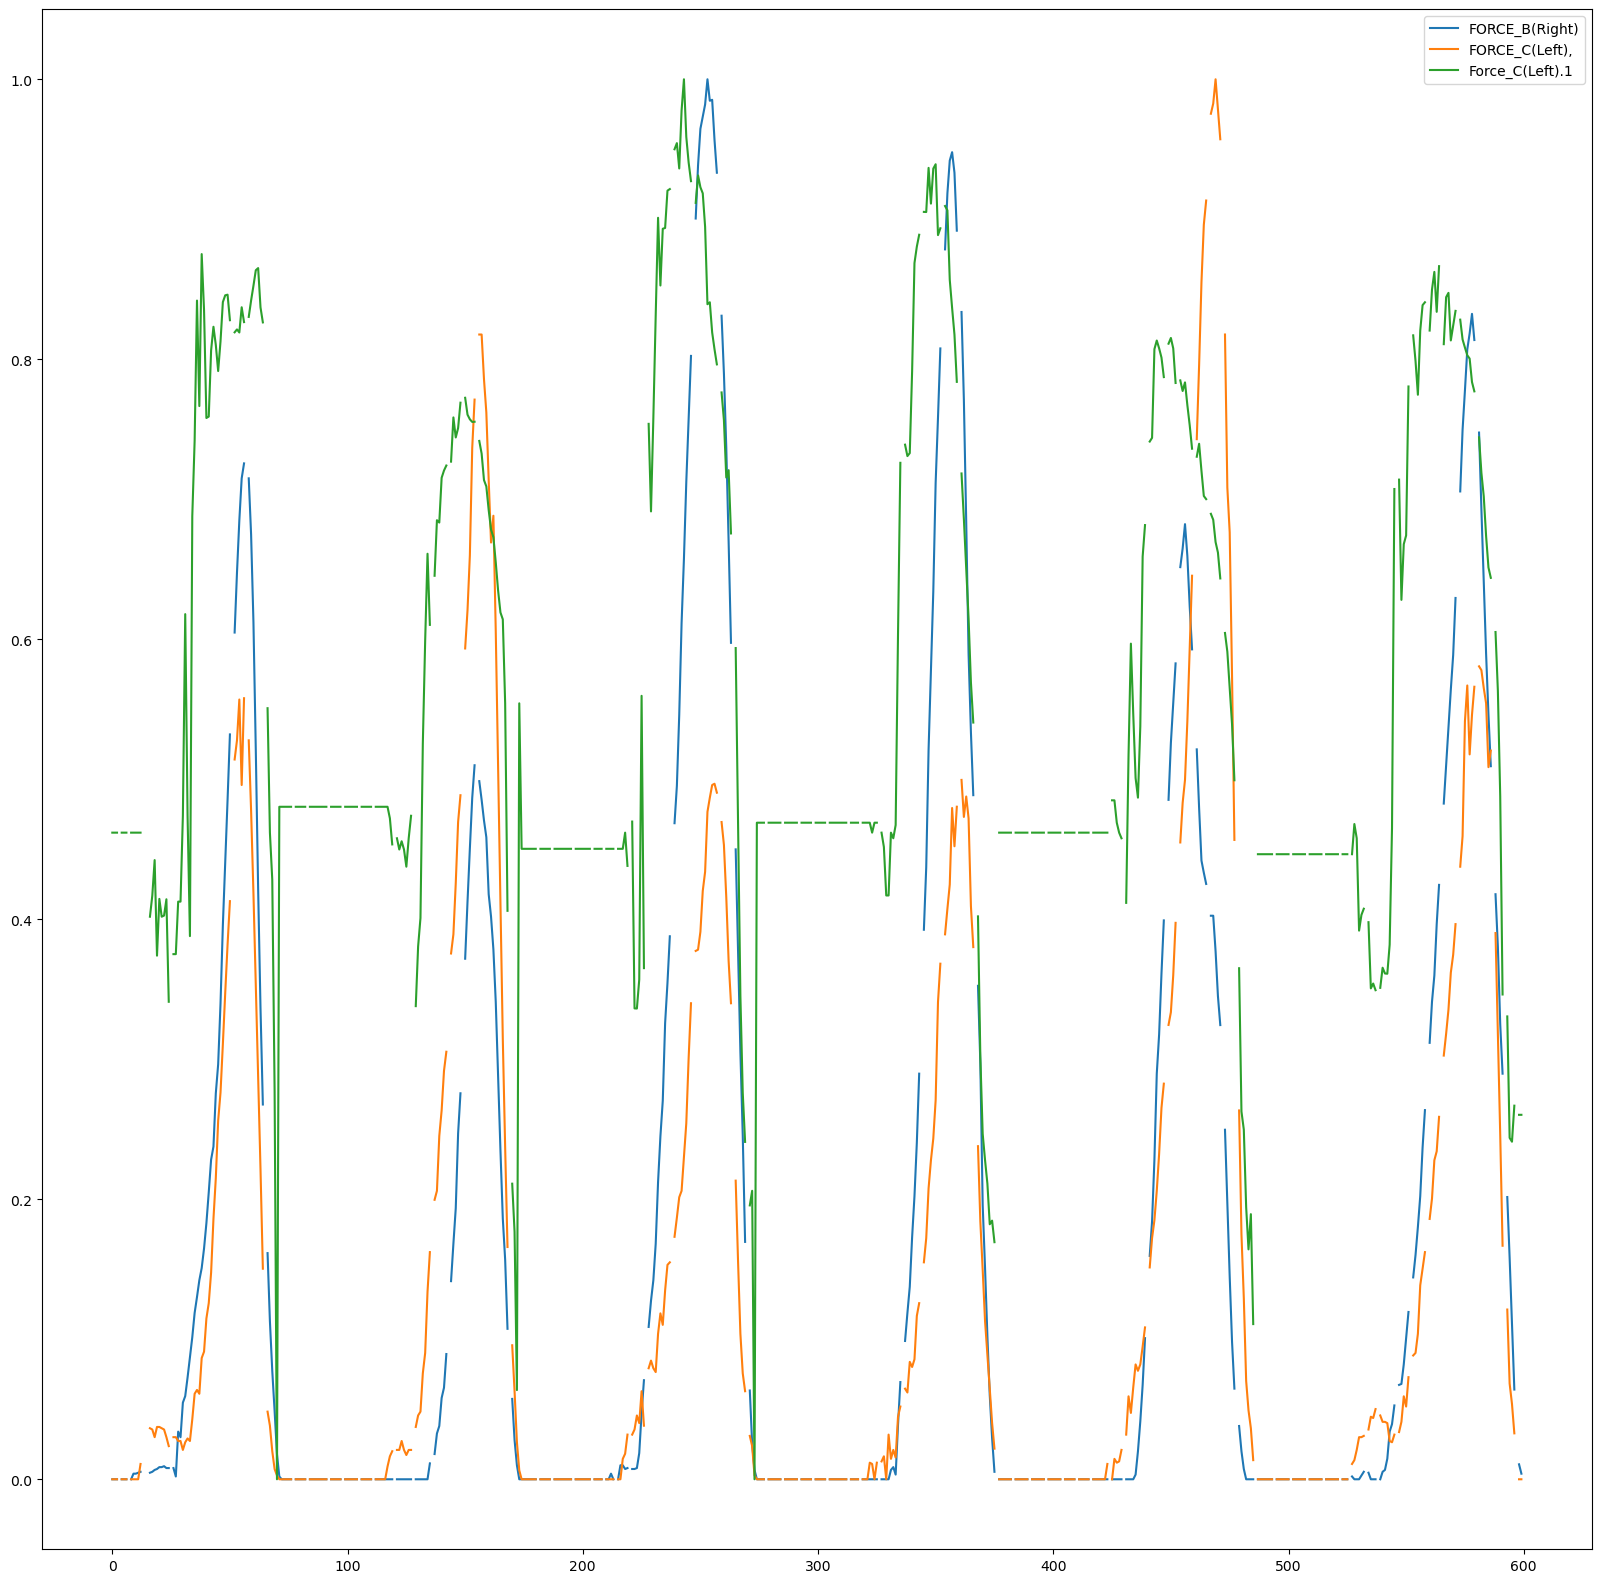

In [471]:
data.plot(figsize=(20,20))

In [472]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)     82
FORCE_C(Left),     82
Force_C(Left).1    82
dtype: int64
FORCE_B(Right)     0
FORCE_C(Left),     0
Force_C(Left).1    0
dtype: int64


FORCE_B(Right)


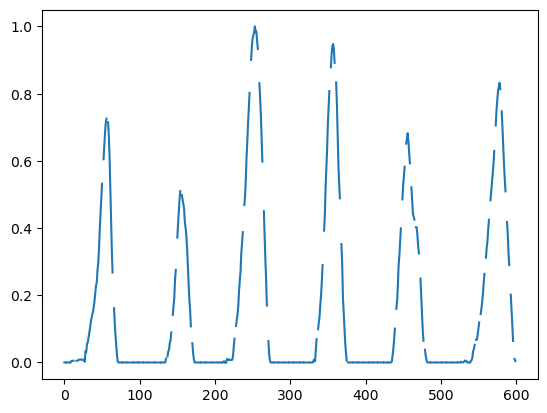

FORCE_C(Left),


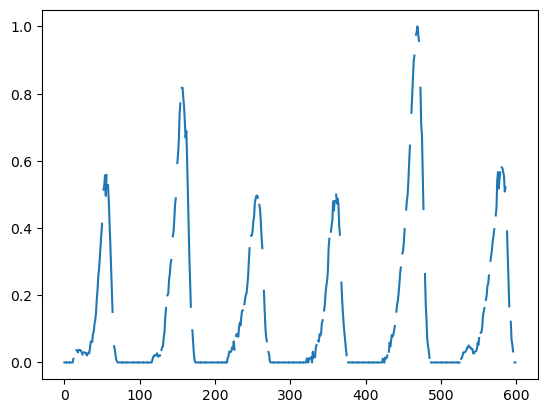

Force_C(Left).1


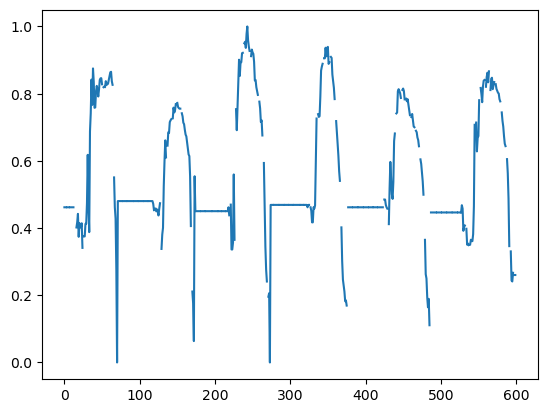

In [473]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [474]:
## R_FORCE_B : FORCE_C(Left),
## R_FORCE_B : Force_C(Left).1

In [475]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm.xlsx")





In [476]:
data_sca.columns

Index(['Unnamed: 0', 'FORCE_B(Right)', 'FORCE_C(Left),', 'Force_C(Left).1'], dtype='object')

In [477]:
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)"],inplace=True)

In [478]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(data_sca)
L_scaled=pd.DataFrame(data=R_scaled)





In [479]:
L_scaled

,0,1
0,0.000000,0.461877
1,0.000000,0.461877
2,0.000000,0.461877
3,0.000000,0.461877
4,0.000000,0.461877
...,...,...
596,0.032817,0.266862
597,0.020055,0.260330
598,0.000000,0.260330
599,0.000000,0.260330


In [480]:
L_new=L_scaled.set_axis(["FORCE_C(Left),","Force_C(Left).1"],axis="columns")



In [481]:
R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','Force_C(Left).1']]

<Axes: >

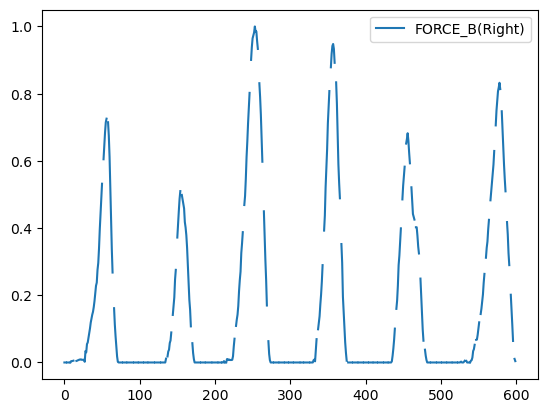

In [482]:
R.plot()

<Axes: >

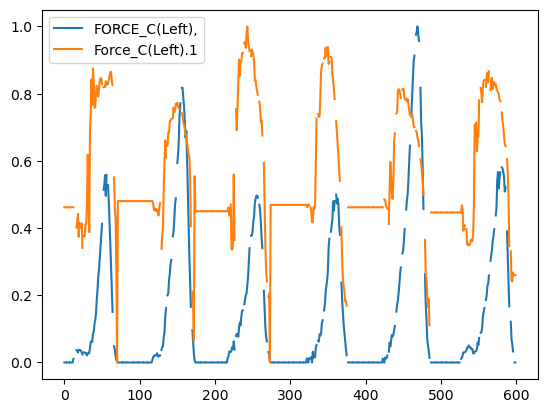

In [483]:
L.plot()

In [484]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)


In [485]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FORCE1_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FORCE1_C=np.setdiff1d(index,loss_index_L_FORCE1_C)

In [486]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [487]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

y_train_L_FORCE1_C=L.iloc[normal_index_L_FORCE1_C,1]
x_test_L_FORCE1_C=loss_index_L_FORCE1_C

L_FORCE_C=L.iloc[:,0].copy()
L_FORCE1_C=L.iloc[:,1].copy()

In [488]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(519, 1)
(519,)


In [489]:
print(x_test_L_FORECE_C.shape)
print(loss_index_L_FORECE_C.shape)

(82, 1)
(82, 1)


In [490]:
#Trial 0 finished with value: 0.03243936533155903 and parameters: {'batch_size': 66, 'epochs': 9064, 'lstm_par1': 207, 'lstm_par2': 40}. Best is trial 0 with value: 0.03243936533155903.

In [491]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model = Sequential()
model.add(LSTM(138, activation='sigmoid',return_sequences=True, input_shape=(x_train_R_FORECE_B.shape[1], 1)))
model.add(LSTM(70,return_sequences=False))  
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 1, 138)            77280     
                                                                 
 lstm_47 (LSTM)              (None, 70)                58520     
                                                                 
 dense_23 (Dense)            (None, 1)                 71        
                                                                 
Total params: 135,871
Trainable params: 135,871
Non-trainable params: 0
_________________________________________________________________


2023-11-15 18:06:50.302863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 18:06:50.305110: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 18:06:50.305975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [492]:
model.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,epochs=10000,verbose=2,batch_size=89,shuffle=True)
pred=model.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

Epoch 1/4500


2023-11-15 18:06:50.689904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 18:06:50.690561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 18:06:50.691460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/6 - 2s - loss: 0.0741 - 2s/epoch - 270ms/step
Epoch 2/4500
6/6 - 0s - loss: 0.0534 - 20ms/epoch - 3ms/step
Epoch 3/4500
6/6 - 0s - loss: 0.0526 - 18ms/epoch - 3ms/step
Epoch 4/4500
6/6 - 0s - loss: 0.0510 - 16ms/epoch - 3ms/step
Epoch 5/4500
6/6 - 0s - loss: 0.0503 - 18ms/epoch - 3ms/step
Epoch 6/4500
6/6 - 0s - loss: 0.0493 - 18ms/epoch - 3ms/step
Epoch 7/4500
6/6 - 0s - loss: 0.0487 - 15ms/epoch - 3ms/step
Epoch 8/4500
6/6 - 0s - loss: 0.0487 - 16ms/epoch - 3ms/step
Epoch 9/4500
6/6 - 0s - loss: 0.0486 - 29ms/epoch - 5ms/step
Epoch 10/4500
6/6 - 0s - loss: 0.0486 - 39ms/epoch - 6ms/step
Epoch 11/4500
6/6 - 0s - loss: 0.0486 - 71ms/epoch - 12ms/step
Epoch 12/4500
6/6 - 0s - loss: 0.0485 - 29ms/epoch - 5ms/step
Epoch 13/4500
6/6 - 0s - loss: 0.0486 - 16ms/epoch - 3ms/step
Epoch 14/4500
6/6 - 0s - loss: 0.0487 - 15ms/epoch - 3ms/step
Epoch 15/4500
6/6 - 0s - loss: 0.0494 - 17ms/epoch - 3ms/step
Epoch 16/4500
6/6 - 0s - loss: 0.0482 - 18ms/epoch - 3ms/step
Epoch 17/4500
6/6 - 0s - loss

2023-11-15 18:08:31.209221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 18:08:31.212606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 18:08:31.225539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 1s 5ms/step


In [493]:
c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

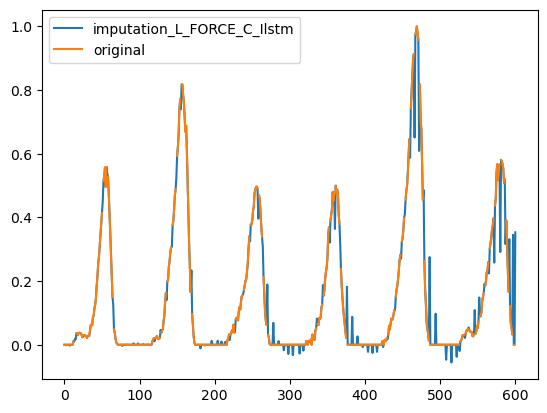

In [494]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_Ilstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [495]:
#[I 2023-11-15 16:47:24,073] Trial 19 finished with value: 0.05587612009634901 and parameters: {'batch_size': 41, 'epochs': 2575, 'lstm_par1': 81, 'lstm_par2': 24}. Best is trial 13 with value: 0.04315084778361758.
#'batch_size': 82, 'epochs': 3599, 'lstm_par1': 66, 'lstm_par2': 60}


In [496]:
model = Sequential()
model.add(LSTM(60, activation='sigmoid',return_sequences=True, input_shape=(x_train_R_FORECE_B.shape[1], 1)))
model.add(LSTM(60,return_sequences=False))  
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 1, 60)             14880     
                                                                 
 lstm_49 (LSTM)              (None, 60)                29040     
                                                                 
 dense_24 (Dense)            (None, 1)                 61        
                                                                 
Total params: 43,981
Trainable params: 43,981
Non-trainable params: 0
_________________________________________________________________


2023-11-15 18:08:32.503262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 18:08:32.505609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 18:08:32.508193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [497]:
model.fit(x_train_R_FORECE_B,y_train_L_FORCE1_C,epochs=10000,verbose=2,batch_size=60,shuffle=True)

Epoch 1/10000


2023-11-15 18:08:32.804448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 18:08:32.805281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 18:08:32.805903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 - 1s - loss: 0.1249 - 1s/epoch - 145ms/step
Epoch 2/10000
9/9 - 0s - loss: 0.0476 - 15ms/epoch - 2ms/step
Epoch 3/10000
9/9 - 0s - loss: 0.0408 - 13ms/epoch - 1ms/step
Epoch 4/10000
9/9 - 0s - loss: 0.0372 - 12ms/epoch - 1ms/step
Epoch 5/10000
9/9 - 0s - loss: 0.0356 - 13ms/epoch - 1ms/step
Epoch 6/10000
9/9 - 0s - loss: 0.0356 - 12ms/epoch - 1ms/step
Epoch 7/10000
9/9 - 0s - loss: 0.0356 - 12ms/epoch - 1ms/step
Epoch 8/10000
9/9 - 0s - loss: 0.0352 - 12ms/epoch - 1ms/step
Epoch 9/10000
9/9 - 0s - loss: 0.0352 - 11ms/epoch - 1ms/step
Epoch 10/10000
9/9 - 0s - loss: 0.0350 - 11ms/epoch - 1ms/step
Epoch 11/10000
9/9 - 0s - loss: 0.0350 - 12ms/epoch - 1ms/step
Epoch 12/10000
9/9 - 0s - loss: 0.0350 - 12ms/epoch - 1ms/step
Epoch 13/10000
9/9 - 0s - loss: 0.0349 - 12ms/epoch - 1ms/step
Epoch 14/10000
9/9 - 0s - loss: 0.0350 - 13ms/epoch - 1ms/step
Epoch 15/10000
9/9 - 0s - loss: 0.0350 - 12ms/epoch - 1ms/step
Epoch 16/10000
9/9 - 0s - loss: 0.0349 - 12ms/epoch - 1ms/step
Epoch 17/10000


In [498]:
pred=model.predict(x_test_L_FORCE1_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 1s 2ms/step


2023-11-15 18:11:38.522170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-15 18:11:38.524069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-15 18:11:38.525264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

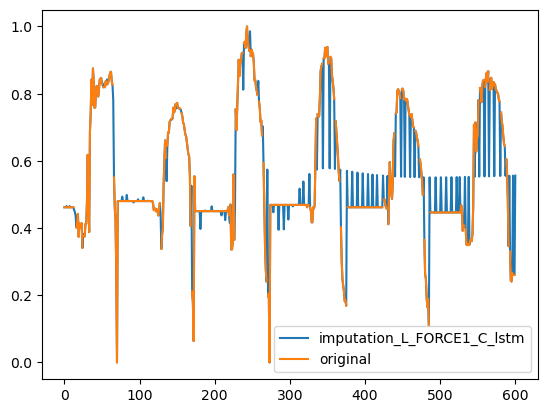

In [499]:
c=0
for i in loss_index_L_FORCE1_C:    
    L_FORCE1_C[i]=pred[c]
    c+=1
    
    #
plt.plot(L_FORCE1_C,label='imputation_L_FORCE1_C_lstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [500]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left),'],L_FORCE_C))
print(RMSE(data_main['Force_C(Left).1'],L_FORCE1_C))

0.03734301997720984
0.051268678540482705


In [501]:
L.isnull().sum()

FORCE_C(Left),     82
Force_C(Left).1    82
dtype: int64

In [502]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left),'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FORCE1_C:    
    L['Force_C(Left).1'][i]=L_FORCE1_C[i]

In [503]:
L.isnull().sum()

FORCE_C(Left),     0
Force_C(Left).1    0
dtype: int64

<Axes: >

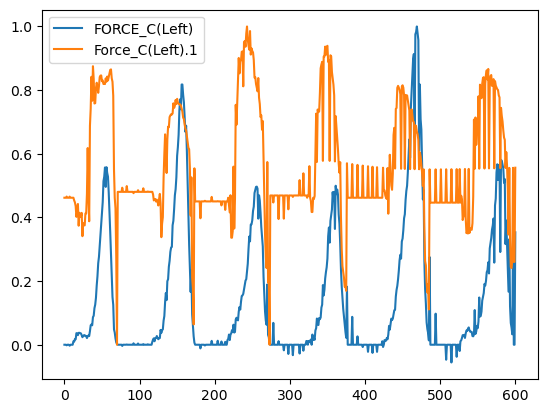

In [504]:
L=L.set_axis(["FORCE_C(Left)","Force_C(Left).1"],axis="columns")
L.plot()

<Axes: >

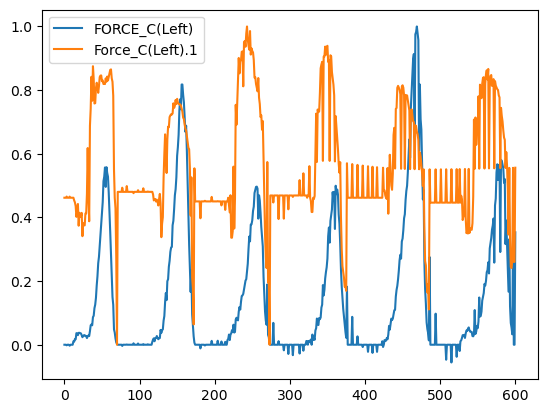

In [505]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","Force_C(Left).1"],axis="columns")
L_sca.plot()